## Importing all the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

## Getting the tomato dataset

In [2]:
dataset_directory_location = 'tomato_dataset'

## Listing the directories present inside tomato dataset

In [3]:
os.listdir(dataset_directory_location)

['test', 'train']

## Getting the training and testing directory location

In [4]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'test')

## Listing all the directories present inside 'train' and 'test' directory respectively

In [5]:
os.listdir(train_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
os.listdir(test_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

## Viewing a 'tomato image with bacterial spot image'

In [7]:
tomato_bacterial_spot_img = os.path.join(train_dataset_location, 'Tomato___Bacterial_spot')

In [8]:
os.listdir(tomato_bacterial_spot_img)[:1]

['00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG']

In [9]:
tomato_bacterial_spot_img_read = imread(os.path.join(tomato_bacterial_spot_img, '00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))

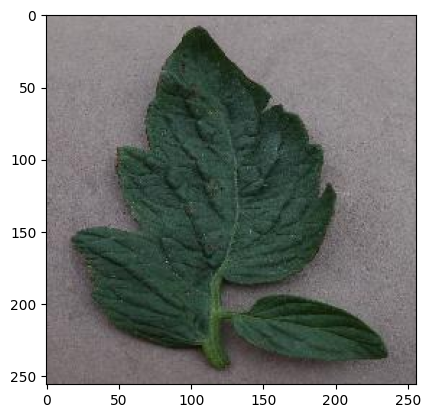

In [10]:
plt.imshow(tomato_bacterial_spot_img_read)

## Getting the shape of the image

In [11]:
tomato_bacterial_spot_img_read.shape

(256, 256, 3)

## Setting the right image shape of the image for our use case

In [12]:
correct_image_shape = (224, 224, 3)

In [13]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest',
                               preprocessing_function=preprocess_input)

In [14]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Creating and training the model

In [15]:
model = Sequential()

In [16]:
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=correct_image_shape)

In [17]:
resnet50_model.trainable = False

In [18]:
model.add(resnet50_model)


model.add(Flatten())


model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [20]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [21]:
model.fit(train_image_gen, validation_data=test_image_gen, epochs=10)

Epoch 1/10
625/625 [==============================] - 170s 256ms/step - loss: 0.8435 - accuracy: 0.7231 - val_loss: 0.4007 - val_accuracy: 0.8770
Epoch 2/10
625/625 [==============================] - 181s 290ms/step - loss: 0.4152 - accuracy: 0.8630 - val_loss: 0.3401 - val_accuracy: 0.8940
Epoch 3/10
625/625 [==============================] - 165s 264ms/step - loss: 0.3234 - accuracy: 0.8948 - val_loss: 0.2804 - val_accuracy: 0.9060
Epoch 4/10
625/625 [==============================] - 160s 256ms/step - loss: 0.2738 - accuracy: 0.9086 - val_loss: 0.2674 - val_accuracy: 0.9070
Epoch 5/10
625/625 [==============================] - 159s 254ms/step - loss: 0.2551 - accuracy: 0.9153 - val_loss: 0.2519 - val_accuracy: 0.9250
Epoch 6/10
625/625 [==============================] - 161s 258ms/step - loss: 0.2193 - accuracy: 0.9283 - val_loss: 0.2338 - val_accuracy: 0.9360
Epoch 7/10
625/625 [==============================] - 165s 264ms/step - loss: 0.1984 - accuracy: 0.9336 - val_loss: 0.2834 -

In [22]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

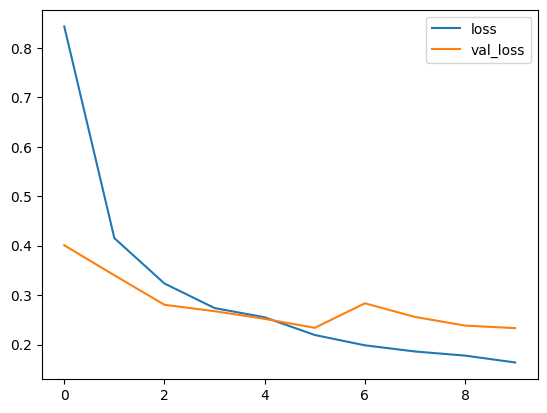

In [23]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

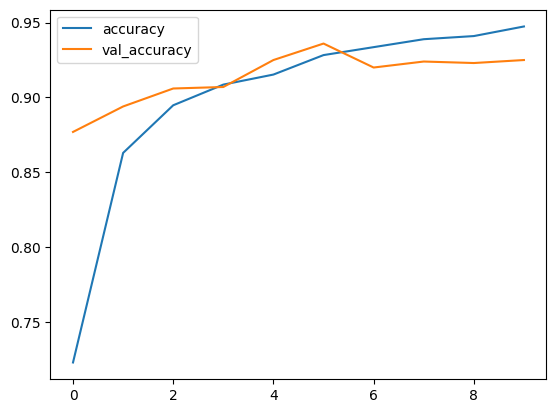

In [24]:
history_df[['accuracy', 'val_accuracy']].plot()

## Calculating the accuracy on training and testing data

In [25]:
model.evaluate(train_image_gen)[1]

625/625 [==============================] - 143s 229ms/step - loss: 0.0818 - accuracy: 0.9733


0.9732999801635742

In [26]:
model.evaluate(test_image_gen)[1]

63/63 [==============================] - 14s 225ms/step - loss: 0.2609 - accuracy: 0.9220


0.921999990940094

## Making prediction on sample data

In [37]:
sample_img_load = image.load_img('./tomato_dataset/test/Tomato___Leaf_Mold/2aa4f976-9ac1-496d-9b58-0ec03e4bbad8___Crnl_L.Mold_7067.JPG_4e754df9-6f7e-4841-bb60-e8cf8894f744.JPG', target_size=correct_image_shape)

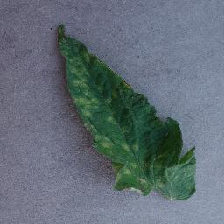

In [38]:
sample_img_load

In [39]:
sample_img_to_arr = image.img_to_array(sample_img_load) 

In [40]:
sample_img_to_arr_preprocess_input = preprocess_input(sample_img_to_arr)

In [41]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr_preprocess_input, 0) 

In [42]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 [==============================] - 0s 48ms/step


In [43]:
pred_result = np.argmax(prediction)

In [44]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [45]:
pred_final_result = class_names[pred_result]

In [46]:
pred_final_result

'Tomato___Leaf_Mold'